In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [2]:
uploaded = files.upload()

Saving ecom_customer_data.xlsx to ecom_customer_data.xlsx


In [3]:
dataset = pd.read_excel("ecom_customer_data.xlsx")

In [4]:
dataset.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
dataset.shape

(30000, 38)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [7]:
dataset.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [8]:
dataset.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
dataset.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [10]:
dataset.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [11]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 1


In [12]:
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 37


In [13]:
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Float variables: 0


In [14]:
dataset.dropna(subset=['Gender'], inplace=True)
dataset.fillna(0, inplace=True)

In [15]:
for column in dataset.columns:
    if dataset[column].dtype != 'object':
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        dataset = dataset[(dataset[column] >= (Q1 - 1.5 * IQR)) & (dataset[column] <= (Q3 + 1.5 * IQR))]

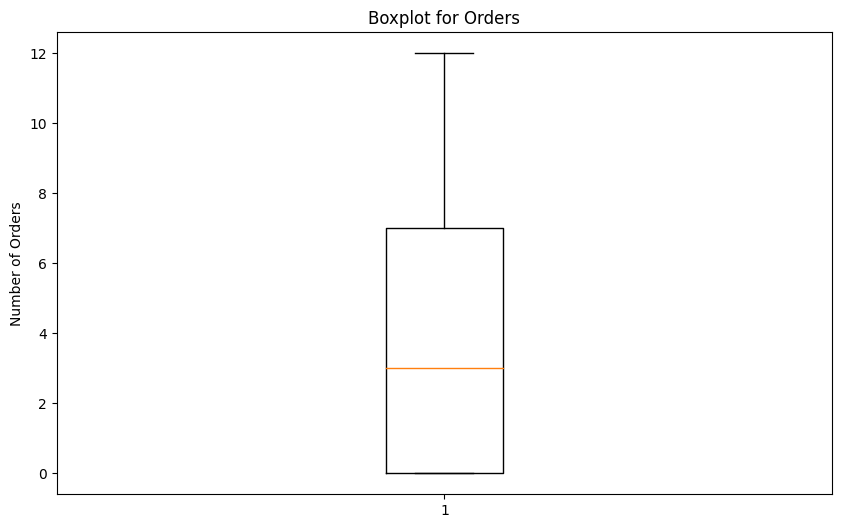

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(dataset['Orders'])
plt.title('Boxplot for Orders')
plt.ylabel('Number of Orders')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

###Data Cleaning

In [18]:
#Encoding categorical variables
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [19]:
#Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
dataset['Gender'] = imputer.fit_transform(dataset[['Gender']])

In [20]:
#Normalizing/standardizing numerical variables if necessary
scaler = StandardScaler()
dataset.iloc[:, 2:] = scaler.fit_transform(dataset.iloc[:, 2:])

In [21]:
dataset.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
72,73,1,1.136616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,224,0,1.409729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,230,0,1.136616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,252,0,1.955955,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,259,0,0.590389,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###EDA

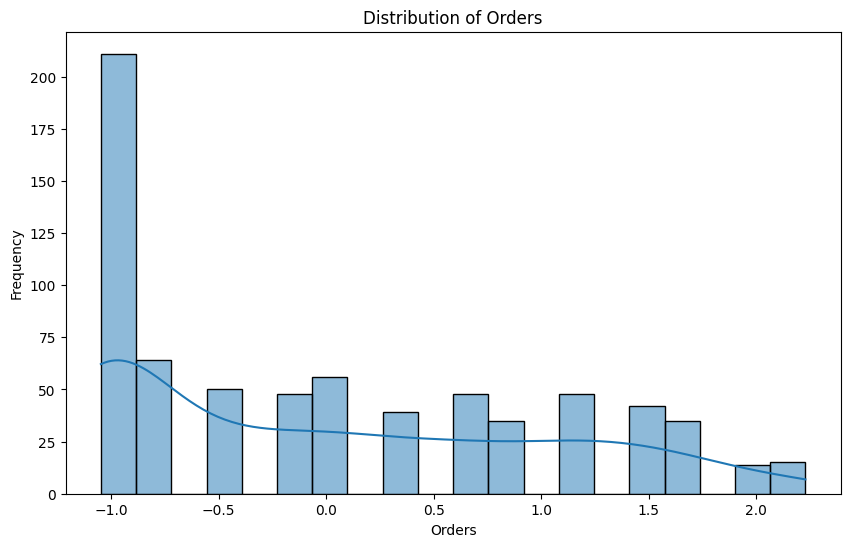

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Orders'], kde=True, bins=20)
plt.title('Distribution of Orders')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.show()

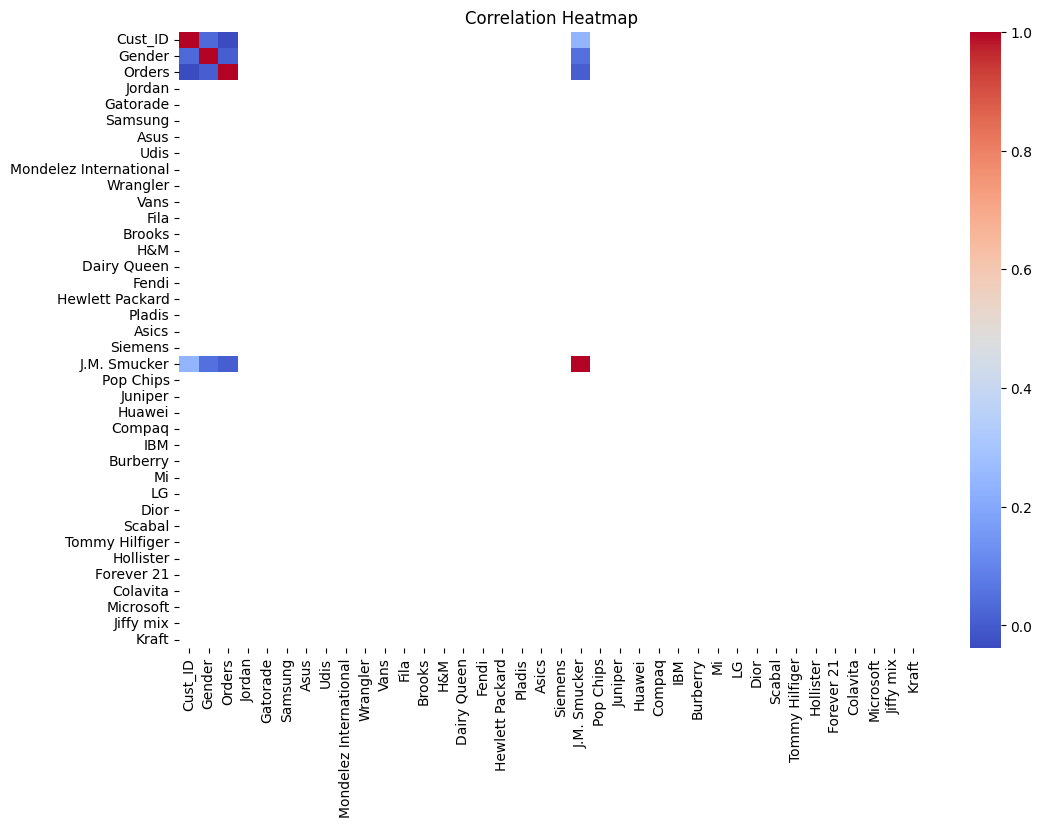

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###Model Training and Evaluation

#####Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = dataset.drop(columns=['Orders'])
y = dataset['Orders']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = linear_reg.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression - Mean Squared Error: {mse}, R2 Score: {r2}')

Linear Regression - Mean Squared Error: 0.971069785614742, R2 Score: -0.06287685867721238


####SVM

In [29]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'SVM - Mean Squared Error: {mse}, R2 Score: {r2}')

SVM - Mean Squared Error: 0.9780979995965073, R2 Score: -0.07056953546492739


####Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest - Mean Squared Error: {mse}, R2 Score: {r2}')

Random Forest - Mean Squared Error: 1.1637847156251944, R2 Score: -0.2738114819803543


In [31]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [32]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test)

cb_r2_score = r2_score(y_test, preds)
cb_r2_score

Learning rate set to 0.037401
0:	learn: 1.0093351	total: 46.3ms	remaining: 46.3s
1:	learn: 1.0086668	total: 47.2ms	remaining: 23.6s
2:	learn: 1.0071570	total: 48.2ms	remaining: 16s
3:	learn: 1.0059721	total: 48.9ms	remaining: 12.2s
4:	learn: 1.0051367	total: 49.5ms	remaining: 9.84s
5:	learn: 1.0038973	total: 50.3ms	remaining: 8.34s
6:	learn: 1.0031131	total: 51.2ms	remaining: 7.26s
7:	learn: 1.0024571	total: 51.9ms	remaining: 6.43s
8:	learn: 1.0021155	total: 52.4ms	remaining: 5.76s
9:	learn: 1.0016526	total: 52.9ms	remaining: 5.24s
10:	learn: 1.0007532	total: 53.7ms	remaining: 4.83s
11:	learn: 1.0003226	total: 54.6ms	remaining: 4.5s
12:	learn: 0.9992265	total: 55.6ms	remaining: 4.22s
13:	learn: 0.9988405	total: 56.4ms	remaining: 3.98s
14:	learn: 0.9985777	total: 57ms	remaining: 3.74s
15:	learn: 0.9980741	total: 57.5ms	remaining: 3.54s
16:	learn: 0.9974100	total: 58.4ms	remaining: 3.38s
17:	learn: 0.9967139	total: 59ms	remaining: 3.22s
18:	learn: 0.9958267	total: 59.9ms	remaining: 3.09s

-0.1901355312964308

###Clustering for Customer Segmentation

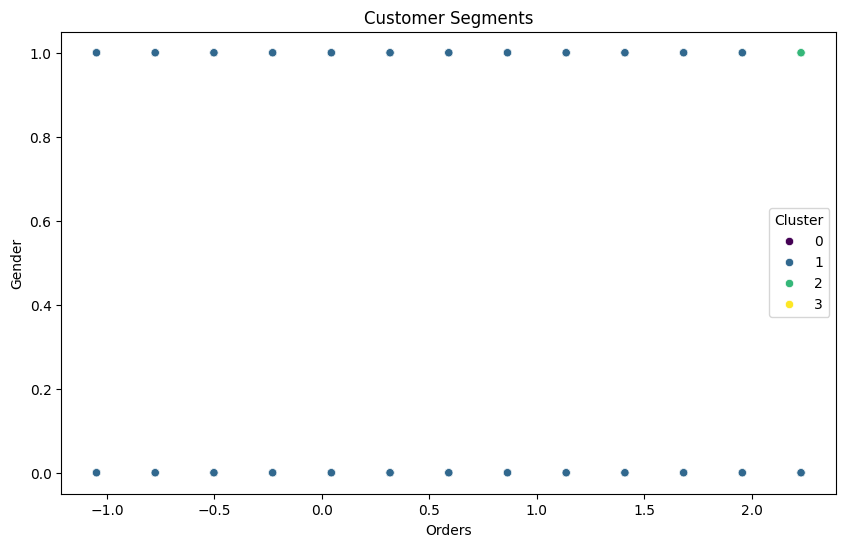

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

dataset['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Orders'], y=dataset['Gender'], hue=dataset['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Orders')
plt.ylabel('Gender')
plt.show()

###Reporting and Visualization

In [34]:
cluster_means = dataset.groupby('Cluster').mean()
print(cluster_means)

              Cust_ID    Gender    Orders  Jordan  Gatorade  Samsung  Asus  \
Cluster                                                                      
0         4476.706161  0.265403  0.026042     0.0       0.0      0.0   0.0   
1        25716.732394  0.333333 -0.069955     0.0       0.0      0.0   0.0   
2        12526.389535  0.261628  0.020345     0.0       0.0      0.0   0.0   
3        19205.100917  0.155963  0.054185     0.0       0.0      0.0   0.0   

         Udis  Mondelez International  Wrangler  ...   LG  Dior  Scabal  \
Cluster                                          ...                      
0         0.0                     0.0       0.0  ...  0.0   0.0     0.0   
1         0.0                     0.0       0.0  ...  0.0   0.0     0.0   
2         0.0                     0.0       0.0  ...  0.0   0.0     0.0   
3         0.0                     0.0       0.0  ...  0.0   0.0     0.0   

         Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
Cluster  

In [35]:
X = dataset[['Gender', 'Orders']]
y = dataset['Orders']

print("Features and Target:")
print(X)
print(y)

Features and Target:
       Gender    Orders
72          1  1.136616
223         0  1.409729
229         0  1.136616
251         0  1.955955
258         0  0.590389
...       ...       ...
29182       0  0.863503
29307       0 -0.502063
29842       0 -1.048290
29873       0 -1.048290
29992       1  0.863503

[705 rows x 2 columns]
72       1.136616
223      1.409729
229      1.136616
251      1.955955
258      0.590389
           ...   
29182    0.863503
29307   -0.502063
29842   -1.048290
29873   -1.048290
29992    0.863503
Name: Orders, Length: 705, dtype: float64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Decision Tree Regression R2-Score: {r2_dt}")
print(f"Decision Tree Regression MSE: {mse_dt}")

Decision Tree Regression R2-Score: 1.0
Decision Tree Regression MSE: 1.3954245922024635e-30
